#Linear Algebra

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

In [0]:
import math
import matplotlib.pyplot as plt
import numpy as np

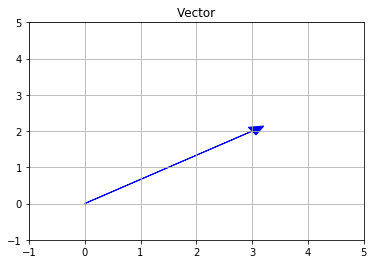

In [2]:
#Draw vector
two_d_vector = [3, 2]

plt.arrow(0,0, two_d_vector[0], two_d_vector[1], head_width=.25, 
          head_length=0.25, color='blue')
plt.title('Vector')
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.grid()
plt.show();

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [3]:
# Norm of a vector represents the length

b = [17, -4, -2, 1]

np.linalg.norm(b)

17.60681686165901

## 1.3 Find $\vec{c} \cdot \vec{d}$ - Are these vectors orthogonal? Why or why not?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [4]:
# Dot product is non-zero implies vectors are NOT orthogonal. 

c = [3, 7, -2, 12]
d = [9, -7, 4, 6]

np.dot(c, d)

42

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [21]:
# E inverse and E transpose

E = np.matrix('7 4 2; 1 3 -1; 2 6 -4')

#or as numpy array
E_array = np.array([[7,4,2],[1,3,-1],[2,6,-4]])

print(E.I)
print("")
print(E.T)
print("")

E_inv = np.linalg.inv(E_array)
print(E_inv)
print('')
print(E_array.transpose())

[[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]

[[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]

[[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]

[[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [6]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [7]:
# Get mean, var, std

customers_mean = df['customers'].mean()
customers_var = df['customers'].var()
customers_std = df['customers'].std()

snow_mean = df['snow'].mean()
snow_var = df['snow'].var()
snow_std = df['snow'].std()

print(f'Customers mean: {customers_mean: 6.2f}   var: {customers_var: 9.2f}  \
  std: {customers_std: 7.2f}')
print(f'Snow      mean:   {snow_mean: 6.2f}   var: {snow_var: 9.2f}  \
  std: {snow_std: 7.2f}')

Customers mean:  1135.71   var:  98761.90    std:  314.26
Snow      mean:     2.71   var:      8.57    std:    2.93


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

In [0]:
# No? They are several orders of magnitude different in scale/range?

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [9]:
# variance-covariance matrix
df.cov()

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


In [10]:
# correlation matrix
df.corr()

,customers,snow
customers,1.000000,0.728463
snow,0.728463,1.000000


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [11]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Standardize data
scaled_data = scaler.fit_transform(df.select_dtypes('number'))

# Put standardized data into dataframe
df_scaled = pd.DataFrame(scaled_data, 
                         columns = df.select_dtypes('number').columns)

df_scaled.head()

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,0.658275,-0.017495,-0.259546,0.644585,-0.632429,0.130551,-0.450076,0.863312,0.377736,-0.336265,0.805477,0.737407,-0.644322,-0.051917,-0.435231,0.104998,-0.138303
1,0.535805,-1.277169,1.198856,1.152440,1.535899,1.547958,0.435696,1.093528,1.401682,0.084066,1.171603,0.929297,1.679463,1.609440,-1.404236,0.841823,0.968122
2,0.535805,-0.227441,0.543811,-0.332059,-1.097071,-0.540853,-1.335847,-0.709834,-0.496364,1.513193,-0.878702,-0.057567,-0.855575,-0.467257,1.190727,0.716563,0.746837
3,-1.729885,1.522105,-1.483121,-1.464967,0.193601,-1.137656,1.350227,-1.247006,-1.283054,-1.260994,-1.098378,-1.609137,-0.179565,-1.090266,0.648741,-1.663384,-1.576656


In [27]:
#SOLUTION

X = df.drop('Country', axis=1)
print(X.head())

numpy_x = X.values
print(numpy_x)

scaler.fit(numpy_x)

transformed_data = scaler.transform(numpy_x)
print(transformed_data)

   Cheese  Carcass_Meat  ...  Alcoholic Drinks  Confectionery
0     105           245  ...               375             54
1     103           227  ...               475             64
2     103           242  ...               458             62
3      66           267  ...               135             41

[4 rows x 17 columns]
[[ 105  245  685  147  193  156  720  253  488  198  360 1102 1472   57
  1374  375   54]
 [ 103  227  803  160  235  175  874  265  570  203  365 1137 1582   73
  1256  475   64]
 [ 103  242  750  122  184  147  566  171  418  220  337  957 1462   53
  1572  458   62]
 [  66  267  586   93  209  139 1033  143  355  187  334  674 1494   47
  1506  135   41]]
[[ 0.65827466 -0.01749546 -0.25954622  0.64458535 -0.63242919  0.13055067
  -0.45007561  0.86331183  0.37773603 -0.33626508  0.80547723  0.73740709
  -0.64432226 -0.05191741 -0.43523112  0.10499766 -0.13830319]
 [ 0.53580495 -1.27716878  1.19885635  1.15244047  1.53589947  1.54795798
   0.43569619  1.0935

## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

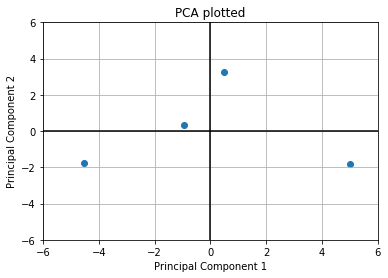

In [13]:
from sklearn.decomposition import PCA

# create the PCA instance
pca = PCA(2)

# fit on data
pca.fit(df_scaled)

# transform data
scaled_transformed = pca.transform(df_scaled)

# Create dataframe for plotting
df_scaled_transformed = pd.DataFrame(data = scaled_transformed,
                                     columns = ['pca1', 'pca2'])

# Plot PCA
plt.scatter(df_scaled_transformed['pca1'], df_scaled_transformed['pca2'])
plt.title('PCA plotted')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.axhline(y = 0, color = 'black')
plt.axvline(x = 0, color = 'black')
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.grid()
plt.show()


eigenvalues:  [6.81637385 4.1124781 ]
  
 data: 
 [[-0.95448984  0.32831832]
 [-4.52095094 -1.73537967]
 [ 0.48797835  3.23367195]
 [ 4.98746242 -1.8266106 ]]


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


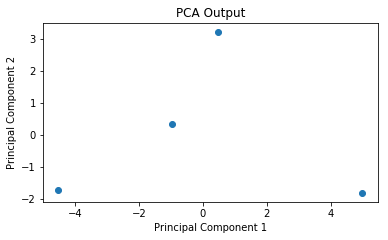

In [33]:
#Solution

pca = PCA(n_components=2)
pca.fit(transformed_data)
output = pca.transform(transformed_data)

print("eigenvalues: ", pca.singular_values_)

print("  \n data: \n", output)

axes = plt.gca()
plt.axes().set_aspect('equal')  #To set axes under same scale

plt.scatter(output[:,0],output[:,1])
plt.title("PCA Output")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [14]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [15]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=5)
kmeans.fit(points)
labels = kmeans.labels_

print(labels)

[3 4 0 3 0 4 3 3 1 4 4 4 0 4 3 0 3 4 4 2 3 2 2 2 4 4 0 1 4 4 4 4 0 2 4 4 4
 4 1 0 0 2 1 1 1 4 4 4 3 0 2 3 3 1 2 0 4 1 1 3 2 0 3 1 2 1 2 1 3 1 4 4 4 4
 2 2 4 4 1 2 1 4 4 4 1 4 1 4 4 2 1 4 2 4 0 4 4 4 4 0 4 4 3 4 4 2 3 3 3 2 0
 2 4 3 0 4 1 1 2 1 2 0 4 3 4 3 4 2 1 3 0 3 4 3 1 1 0 2 3 4 1 4 4 2 0 1 4 1
 3 4 4 0 3 2 4 1 0 2 4 3 0 4 1 3 2 2 0 1 0 0 3 0 1 2 0 4 4 4 4 3 4 0 4 4 0
 4 3 2 1 0 4 3 2 3 4 1 2 2 0 0]


In [16]:
# Add our new labels to the dataframe
new_series = pd.Series(labels)
points['clusters'] = new_series.values

points.head()

,x,y,clusters
0,-7.846803,-3.421277,3
1,-3.554323,-6.884729,4
2,-0.192822,-9.671030,0
3,-6.401456,-5.223972,3
4,-0.804026,-9.704457,0


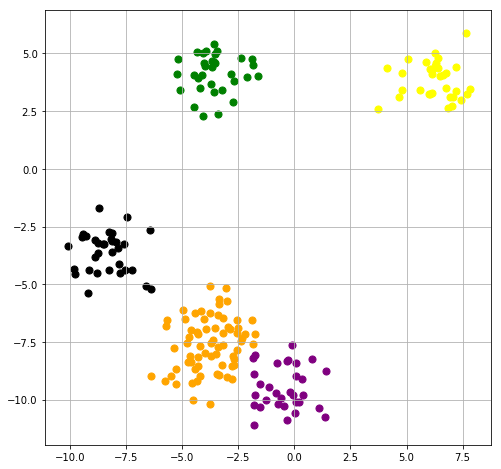

In [17]:
# Plot each cluster

labels = [0, 1, 2, 3, 4]
colors = ['purple', 'green', 'yellow', 'black', 'orange']

plt.figure(figsize = (8, 8))
for label, color in zip(labels, colors):
  index_ = points['clusters'] == label
  plt.scatter(points.loc[index_, 'x'], points.loc[index_, 'y'],
            c = color, s = 50)
plt.grid()
plt.show()


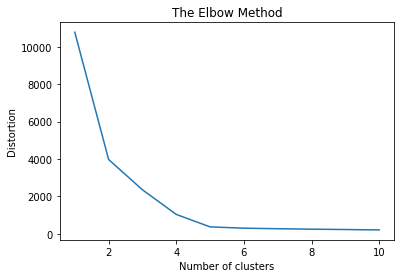

Man, the elbow method sucks...


In [37]:
#SOLUTION

numpy_points = points.values #turn into numpy array instead of dataframe

distortion =[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(numpy_points)
  distortion.append(kmeans.inertia_)
  
plt.plot(range(1,11),distortion)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion') # within cluster sum of squares
plt.show()

print("Man, the elbow method sucks...")

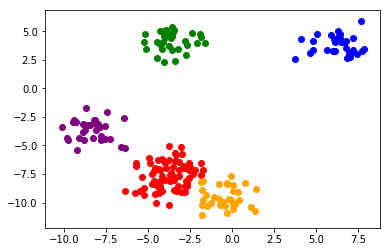

In [38]:
#SOLUTOIN CONT'd

kmeans = KMeans(n_clusters=5, max_iter=300, n_init=10)
clusters = kmeans.fit_predict(numpy_points)

plt.scatter(numpy_points[clusters == 0,0], numpy_points[clusters ==0, 1], color='red')
plt.scatter(numpy_points[clusters == 1,0], numpy_points[clusters ==1, 1], color='blue')
plt.scatter(numpy_points[clusters == 2,0], numpy_points[clusters ==2, 1], color='green')
plt.scatter(numpy_points[clusters == 3,0], numpy_points[clusters ==3, 1], color='purple')
plt.scatter(numpy_points[clusters == 4,0], numpy_points[clusters ==4, 1], color='orange')

plt.show()